# Package

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data 

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

# Missing values 

In [4]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

# EDA 

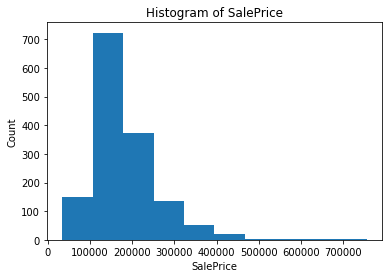

In [6]:
_ = plt.hist(df['SalePrice'])
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of SalePrice')
plt.show()

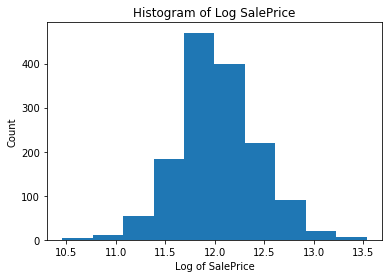

In [7]:
_ = plt.hist(np.log(df['SalePrice']))
_ = plt.xlabel('Log of SalePrice')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of Log SalePrice')
plt.show()

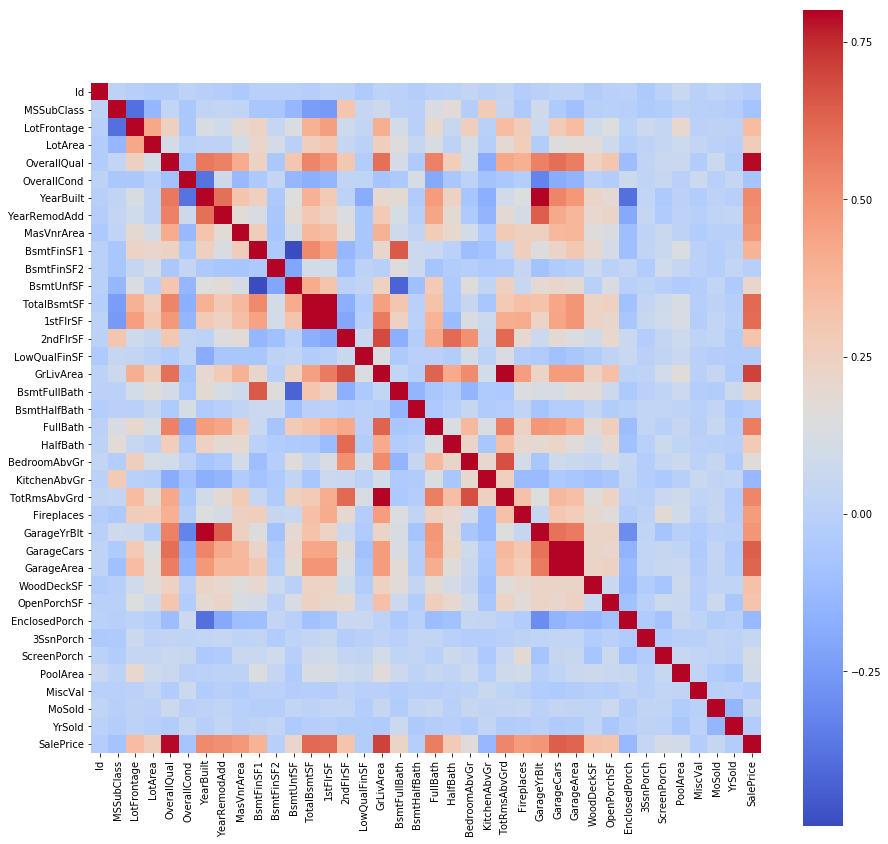

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(corrmat, vmax = 0.8, square = True, cmap = 'coolwarm')
plt.show()

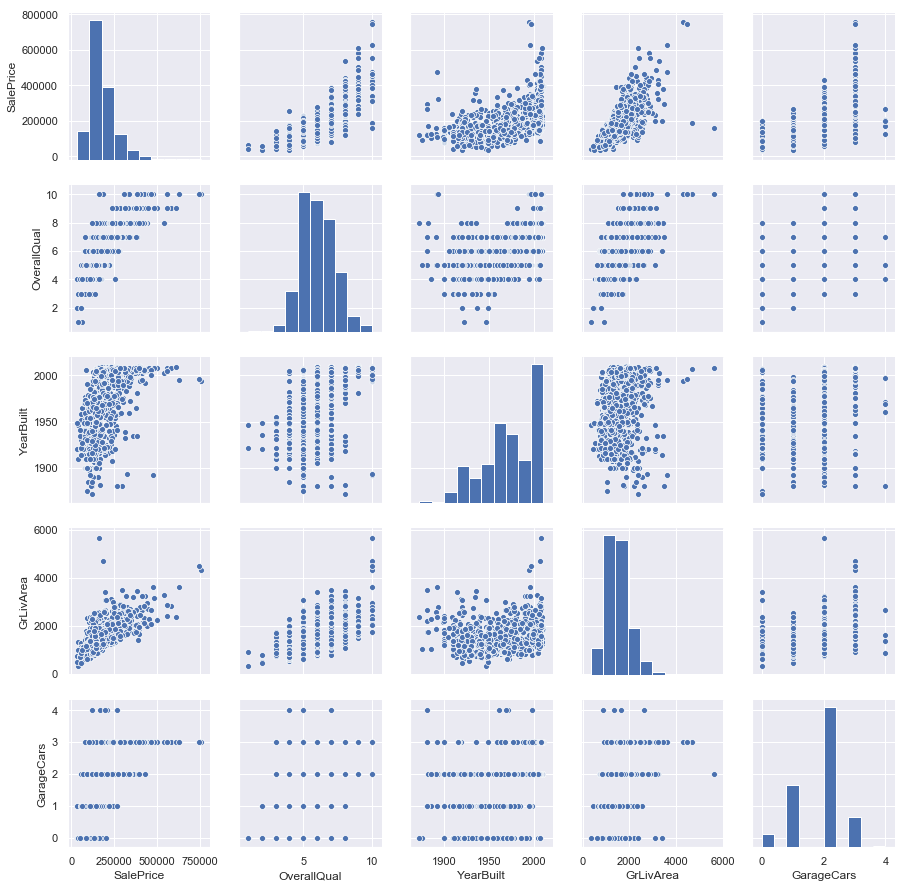

In [11]:
sns.set()
COLUMNS = ['SalePrice', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars']
_ = sns.pairplot(df[COLUMNS])
plt.show()

# Categorical variables

In [16]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
print('Number of numeric columns: {}'.format(len(num_cols)))
print('Number of categorical columns: {}'.format(len(cat_cols)))

Number of numeric columns: 38
Number of categorical columns: 43


In [18]:
for x in cat_cols:
    print(df[x].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
Normal     1198
Partial     125


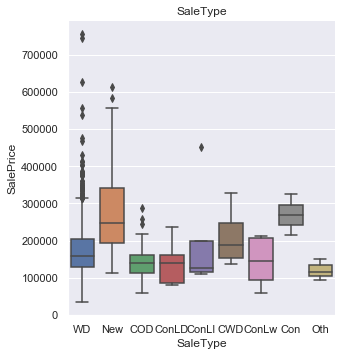

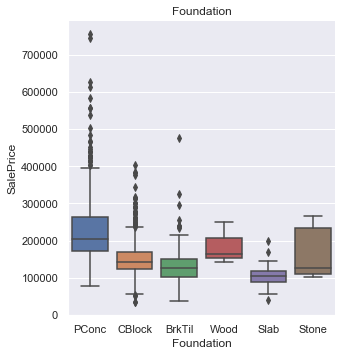

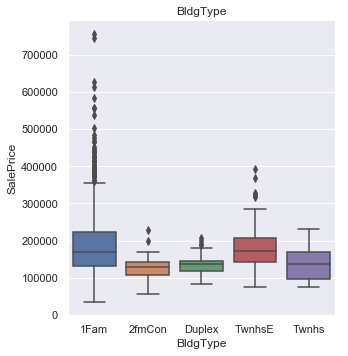

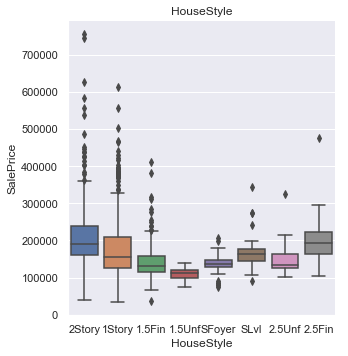

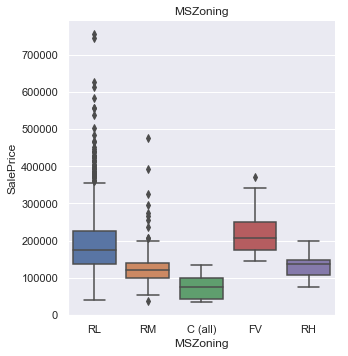

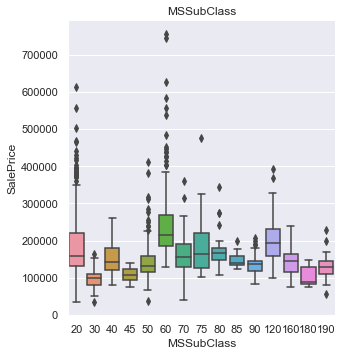

In [19]:
COLUMNS = ['SaleType', 'Foundation', 'BldgType', 'HouseStyle', 'MSZoning', 'MSSubClass']

for x in COLUMNS:
    sns.catplot(x = x, y = 'SalePrice', kind = 'box', data = df)
    plt.title(x)